# TASK-2

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import tsfel
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## Q1


### Function for Decision Tree using sklearn

In [32]:
def DecisionTreeClassifierFunc(X_train,y_train,X_test,y_test):
    

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')


    conf_matrix = confusion_matrix(y_test, y_pred)

   

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
     # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


### 2.1.1 Decision Tree Classification on Raw accelerometer dataset.

Accuracy: 0.6481
Precision: 0.6476
Recall: 0.6481


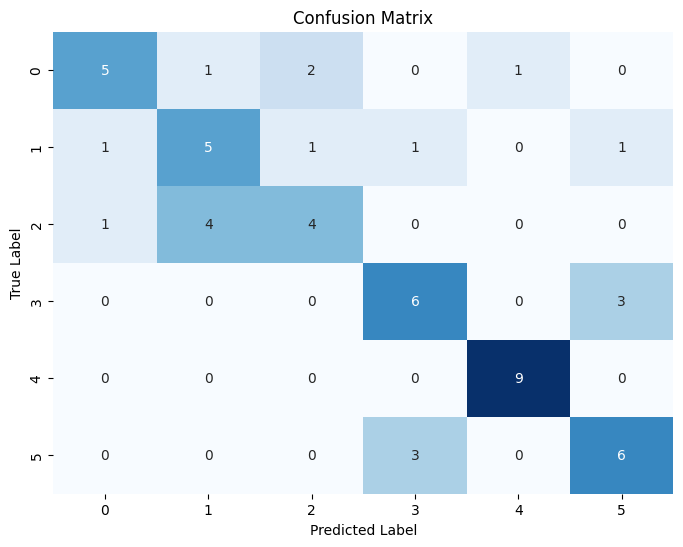

In [39]:
from HAR.MakeDataset import X_train, y_train, X_test,y_test

# accx^2 + accy^2+ accZ^2
X_train = np.square(X_train[:, :, 0]) + np.square(X_train[:, :, 1]) + np.square(X_train[:, :, 2])
y_train = np.reshape(y_train, (y_train.shape[0], 1))
X_test = np.square(X_test[:, :, 0]) + np.square(X_test[:, :, 1]) + np.square(X_test[:, :, 2])
y_test = np.reshape(y_test, (y_test.shape[0], 1))
X_train_raw = pd.DataFrame(X_train)
y_train_raw = pd.DataFrame(y_train)
X_test_raw = pd.DataFrame(X_test)
y_test_raw = pd.DataFrame(y_test)

DecisionTreeClassifierFunc(X_train_raw,y_train_raw,X_test_raw,y_test_raw)

### 2.1.2 Decision Tree Classification on TSFEL feature dataset.

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
Accuracy: 0.7037
Precision: 0.7008
Recall: 0.7037


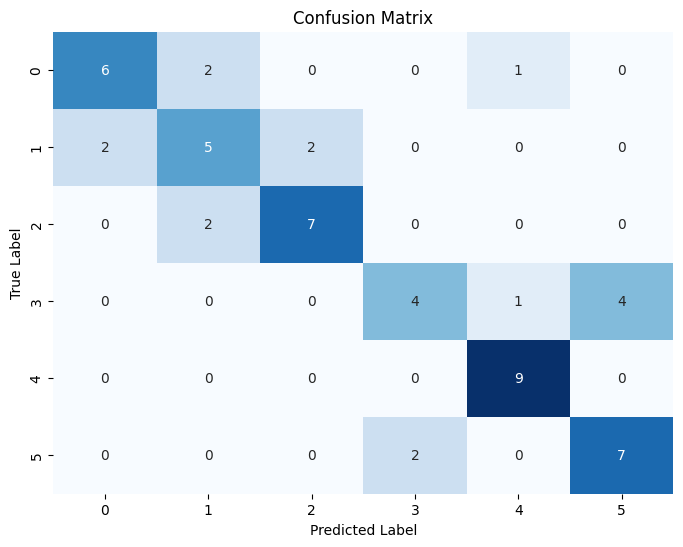

In [40]:
import tsfel

X_train_sig = list(X_train_raw.to_numpy())
X_test_sig = list(X_test_raw.to_numpy())


cfg_file = tsfel.get_features_by_domain()  # All features
# Get features
X_train_TSFEL = tsfel.time_series_features_extractor(cfg_file, X_train_sig, fs = 100)
X_test_TSFEL = tsfel.time_series_features_extractor(cfg_file, X_test_sig, fs = 100)

y_train_TSFEL = y_train_raw
y_test_TSFEL = y_test_raw


DecisionTreeClassifierFunc(X_train_TSFEL,y_train_TSFEL,X_test_TSFEL,y_test_TSFEL)

### 2.1.3 Decision Tree Classification on Feature dataset (X_train).

Accuracy: 0.8622
Precision: 0.8633
Recall: 0.8622


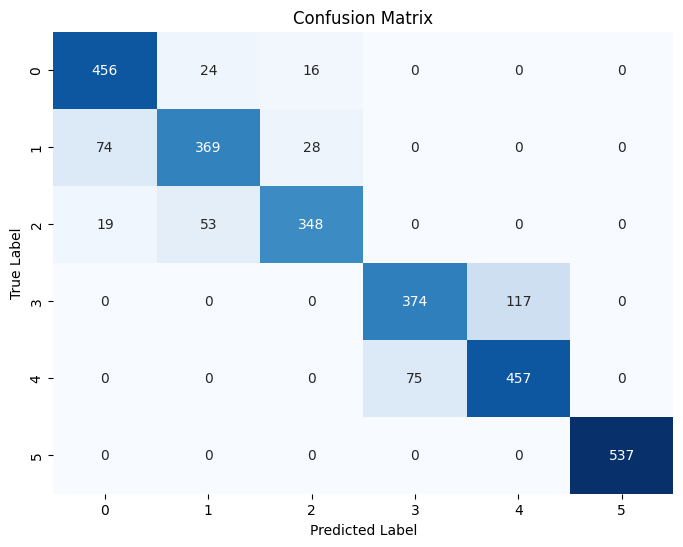

In [41]:
X_train = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "X_train.txt"), sep='\s+', header=None)
y_train = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)
X_test = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/test", "X_test.txt"), sep='\s+', header=None)
y_test = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/test", "y_test.txt"), sep='\s+', header=None)

DecisionTreeClassifierFunc(X_train,y_train,X_test,y_test)

## Q2